In [1]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [5]:
from sqlalchemy import extract

In [6]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_tobs = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date.like('%-06-%'))

In [7]:
#  3. Convert the June temperatures to a list.
june_list = june_tobs.all()

In [8]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_list, columns=['date','temperature'])

In [9]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [10]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dic_tobs = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date.like('%-12-%'))

In [11]:
# 7. Convert the December temperatures to a list.
dic_list = dic_tobs.all()

In [12]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dic_df = pd.DataFrame(dic_list, columns=['date','temperature'])

In [13]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dic_df.describe()

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## Additional Queries

### June

In [14]:
june_df.set_index(june_df['date'],inplace=True)
june_df=june_df.sort_index()

<AxesSubplot:xlabel='date'>

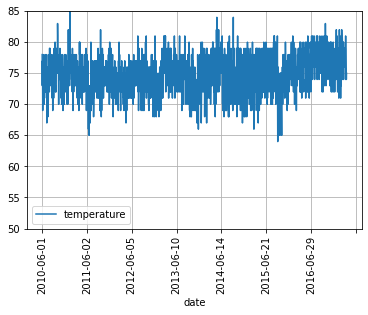

In [15]:
june_df.plot(ylim=[50, 85],rot=90,grid=True)

<AxesSubplot:ylabel='Frequency'>

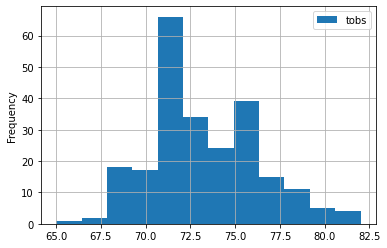

In [16]:
# For the station with the highest number observations:
# We'll query the temperature observations for December and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date.like('%-06-%')).all()

df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12,grid=True)

### December

In [17]:
dic_df.set_index(dic_df['date'],inplace=True)
dic_df=dic_df.sort_index()

<AxesSubplot:xlabel='date'>

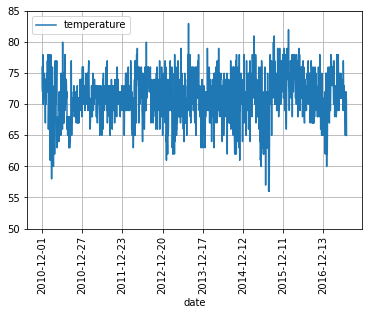

In [18]:
dic_df.plot(ylim=[50, 85],rot=90,grid=True)

<AxesSubplot:ylabel='Frequency'>

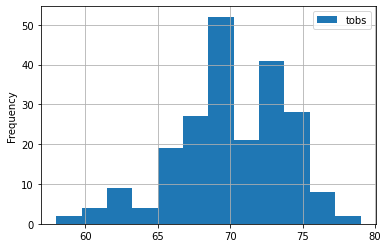

In [19]:
# For the station with the highest number observations:
# We'll query the temperature observations for December and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date.like('%-12-%')).all()

df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12,grid=True)

In [ ]:
month_df.set_index(month_df['date'],inplace=True)
month_df=month_df.sort_index()

month_df.plot(ylim=[50, 85],rot=90,grid=True)

In [ ]:
# For the station with the highest number observations:
# We'll query the temperature observations for December and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date.like('%-%m-%')).all()

df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12,grid=True)